In [1]:
import numpy as np
import numpy.random as random
import math
number_of_targets =5
time_samples = 100
radarPositions = []
radarPositions.append([50,50])
radarPositions.append([250,200])
radarPositions.append([80,20])
number_of_radars = len(radarPositions)
x_true = np.zeros((time_samples,number_of_targets))
y_true = np.zeros((time_samples,number_of_targets))
x_report = np.zeros((time_samples,number_of_targets,number_of_radars))
y_report = np.zeros((time_samples,number_of_targets,number_of_radars))
speed = np.zeros(number_of_targets)
course = np.zeros(number_of_targets)

for targetIndex in range (0,number_of_targets):
    #khởi tại giá trị tại mốc 0 thời gian
    x_true[0][targetIndex]= random.random()*10+100 #giá trị phân bố đều từ 100 đến 110km
    y_true[0][targetIndex]= random.random()*10+100 #giá trị phân bố đều từ 100 đến 110km
    speed[targetIndex] = 0.05+random.random()*0.1#speed from 18 to 54km/h
    course[targetIndex] = random.random()*3.1415926535*2# từ 0 đến 2pi
    #cập nhật tọa độ thực của mục tiêu dựa trên tốc đọ và hướng di chuyển
    for timeIndex in range(1,time_samples):
        
        dx = speed[targetIndex]*math.sin(course[targetIndex])  
        dy = speed[targetIndex]*math.cos(course[targetIndex]) 
        x_true[timeIndex][targetIndex] = dx + x_true[timeIndex-1][targetIndex]
        y_true[timeIndex][targetIndex] = dy + y_true[timeIndex-1][targetIndex]
    #cập nhật tọa độ đo được của mục tiêu dựa trên tọa độ cự ly phương vị từ các đài và sai số đo 
    for timeIndex in range(0,time_samples):
        for radarIndex in range(0,number_of_radars):
            dx = x_true[timeIndex][targetIndex]-radarPositions[radarIndex][0]
            dy = y_true[timeIndex][targetIndex]-radarPositions[radarIndex][1]
            r_target = math.sqrt(dx*dx+dy*dy) + np.random.normal(0, 0.01, 1)[0]#sai số đo cự ly sigma = 0.01km
            azi_target = math.atan(dx/dy) + np.random.normal(0, 0.5/57.3, 1)[0]#sai số đo phương vị sigma = 0.5 độ
            if (dy<0):
                azi_target = azi_target+3.1415926535
            x_report[timeIndex][targetIndex][radarIndex] = radarPositions[radarIndex][0]+r_target*math.sin(azi_target)
            y_report[timeIndex][targetIndex][radarIndex] = radarPositions[radarIndex][1]+r_target*math.cos(azi_target)
            
        
    

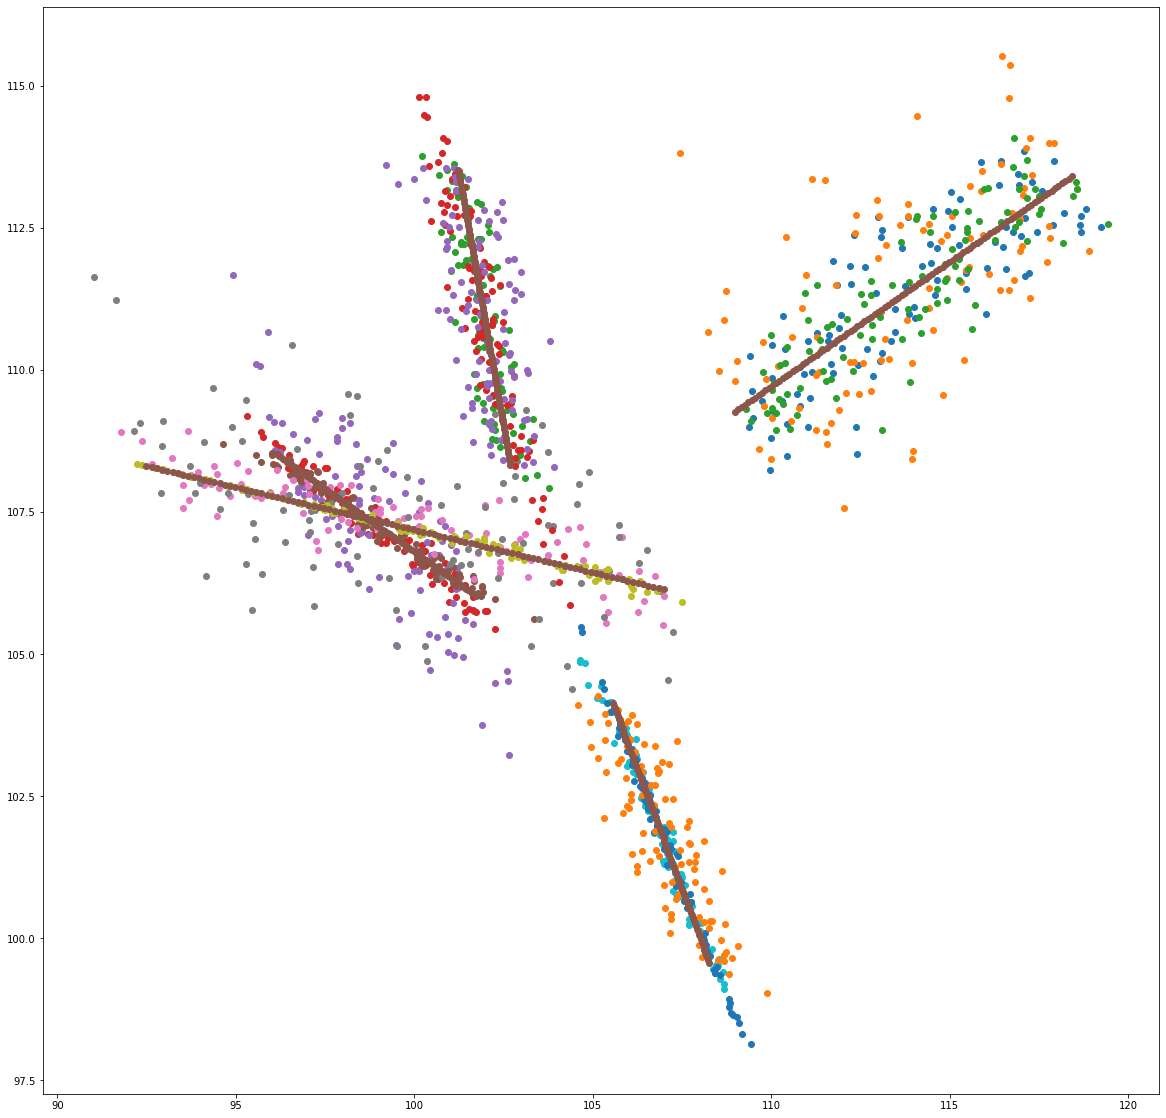

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#vẽ quỹ đạo 1 mục tiêu trên các đài khác nhau
figure(figsize=(20,20))
for targetIndex in range(0,number_of_targets):
    for radarIndex in range(0,number_of_radars):
        plt.scatter(x_report[:, targetIndex,radarIndex], y_report[:, targetIndex,radarIndex])
# for targetIndex in range(0,number_of_targets):
plt.scatter(x_true[:, :], y_true[:, :])
plt.show()

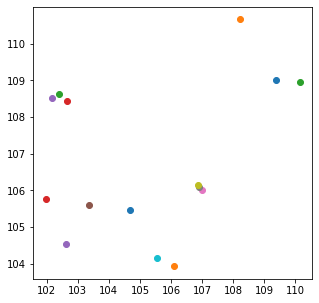

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy
#vẽ quỹ đạo tại 1 thời điểm t=i
timeIndex = 1
figure(figsize=(5,5))
data = np.zeros((number_of_targets*number_of_radars,2))
for targetIndex in range(0,number_of_targets):
    for radarIndex in range(0,number_of_radars):
        data[targetIndex*number_of_radars+radarIndex,0] = x_report[timeIndex,targetIndex,radarIndex]
        data[targetIndex*number_of_radars+radarIndex,1] = y_report[timeIndex,targetIndex,radarIndex]
        plt.scatter(x_report[timeIndex, targetIndex,radarIndex], y_report[timeIndex, targetIndex,radarIndex])
# for targetIndex in range(0,number_of_targets):
#     plt.scatter(x_true[timeIndex, :], y_true[timeIndex, :])
plt.show()




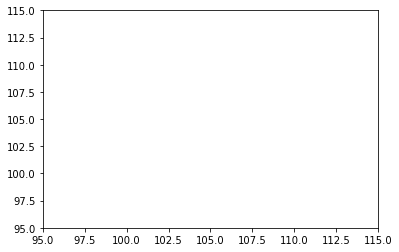